In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform

## MC integrace

Vypočtěte integrál $\int_0^1 x^n {\rm d}x$ pro $n=4$ metodou Monte Carlo s 1000 rovnoměrně rozloženými vzorky

In [2]:
def f(x, n=20): return x**n*np.sin(np.pi*20.5*x)

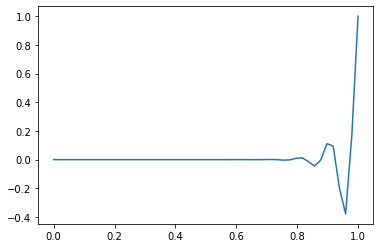

In [3]:
x = np.linspace(0, 1)
plt.plot(x, f(x))

In [4]:
def integrate_MC(f, a, b, nsampl):
    xsamples = uniform(a, b, nsampl)
    fsamples = f(xsamples)
    integral = np.mean(fsamples)*(b-a)
    return integral

In [5]:
integrate_MC(f, 0, 1, 1000)

0.00455812580980401

Odhadněte chybu výpočtu. Opakujte pro 1, 10, 100,.... 100000 vzorků

In [6]:
def test_integrate_MC(f, a, b, nsampl, ntest, integrator=integrate_MC):
    integrals = [integrator(f, a, b, nsampl) for _ in range(ntest)]
    return np.mean(integrals), np.std(integrals)

In [7]:
nsampls = 10**np.arange(6)
ntest = 20

In [11]:
integrals = np.array([test_integrate_MC(f, 0, 1, nsampl, ntest) for nsampl in nsampls])

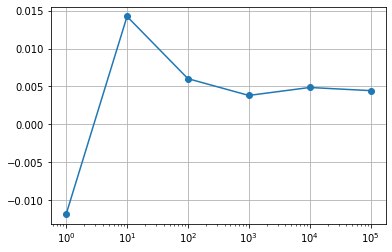

In [12]:
plt.plot(nsampls, integrals[:,0], "-o")
plt.gca().set_xscale("log")
plt.grid()

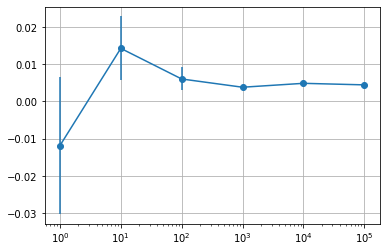

In [13]:
plt.errorbar(nsampls, integrals[:,0], fmt="-o", yerr=integrals[:,1]/np.sqrt(ntest))
plt.gca().set_xscale("log")
plt.grid()

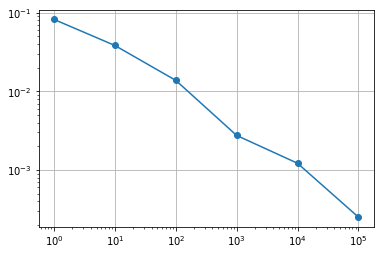

In [14]:
plt.loglog(nsampls, integrals[:,1], "-o")
plt.gca().set_xscale("log")
plt.grid()

### Generování náhodných čísel

Generujte náhodná čísla s rozdělovací funkcí $f = (n+1)x^n$ na intervalu 0, 1 a ověřte funkčnost podle histogramu

In [15]:
def gen_dist(x, n=20):
    return x**n*(n+1)

def gen_inverse(nsampl, n=20):
    # DF = x**n*(n+1)
    # CDF = x**(n+1)
    # inv CDF = x**(1/(n+1))
    xsampl = uniform(0, 1, nsampl)
    return xsampl**(1/(n+1))

In [16]:
samples = gen_inverse(10000)

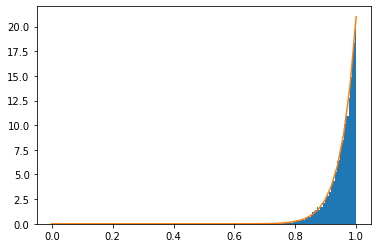

In [17]:
plt.hist(samples, density=True, bins=100);
x = np.linspace(0,1)
plt.plot(x, x**20*21)

In [18]:
def integrate_MC_importance(f, a, b, nsampl):
    xsamples = gen_inverse(nsampl)
    fsamples = f(xsamples)/gen_dist(xsamples)
    integral = np.sum(fsamples)/nsampl*(b-a)
    return integral

In [19]:
integrate_MC_importance(f, 0, 1, 1000)

0.004721383875861847

In [20]:
integrals_importance = np.array([test_integrate_MC(f, 0, 1, nsampl, ntest, integrator=integrate_MC_importance) for nsampl in nsampls])

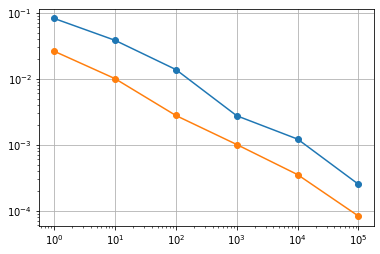

In [21]:
plt.loglog(nsampls, integrals[:,1], "-o")
plt.loglog(nsampls, integrals_importance[:,1], "-o")
plt.gca().set_xscale("log")
plt.grid()